In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Embedding, Input, Bidirectional
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/blog-gender-dataset_csv.csv')

Text(0.5, 1.0, 'Number of male and female blogs')

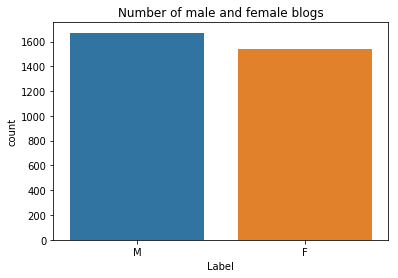

In [3]:
sns.countplot(df.Gender)
plt.xlabel('Label')
plt.title('Number of male and female blogs')

In [4]:
X = df.Blog.astype(str)
Y = df.Gender
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, shuffle=True, stratify=Y)

In [6]:
max_words = 1000
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [7]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,300,input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(128))(layer)
    layer = Dense(32,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [8]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 300)          300000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               439296    
_________________________________________________________________
FC1 (Dense)                  (None, 32)                8224      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)  

In [9]:
model.fit(sequences_matrix,Y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
# model.fit(sequences_matrix, Y_train, batch_size=128, epochs=3, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 2184 samples, validate on 546 samples
Epoch 1/10
2184/2184 [==============================] - 79s 36ms/step - loss: 0.6945 - acc: 0.5023 - val_loss: 0.6899 - val_acc: 0.5476
Epoch 2/10
2184/2184 [==============================] - 64s 29ms/step - loss: 0.6645 - acc: 0.6223 - val_loss: 0.6657 - val_acc: 0.6117
Epoch 3/10
2184/2184 [==============================] - 66s 30ms/step - loss: 0.5883 - acc: 0.7001 - val_loss: 0.6947 - val_acc: 0.6172


In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

482/482 [==============================] - 8s 17ms/step


In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.709
  Accuracy: 0.591


"Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.  Btw. I did MLT on yesterday evening after 2 beers (it had to be Ballmer peak).  Altough the implementation is still very fresh it easily outperforms standard path tracing, what is to be seen especially when difficult caustics are involved.  I've implemented spectral rendering too, it was very easy actually, cause all computations on wavelengths are linear just like rgb. But then I realised that even if it does feel more physically correct to do so, whats the point? 3d applications are operating in rgb color space, and because I cant represent a rgb color as spectrum interchangeably I have to approximate it, so as long as I'm not running a physical simulation or something I don't see the benefits (please correct me if I'm wrong), thus I abandoned that."